## **Upload File**

The CSV file is uploaded from the drive to Google Colab using the following code:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Gathering Data**

We start by importing important libraries. Such as Pandas and Numpy are data manipulation libraries. Also seaborn as data visualization library

The goal of this is to look at the titanic data from a clustering perspective. I will do some basic cleaning and a simple K-Means fit. Then I will perform cluster analysis. I do not check very closly to see if my K-Means did a good job, I just want to analyze the clusters. Normally one might try different models with different hyperparameters.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

#The KMeans alogorithm
from sklearn.cluster import KMeans

Now the CSV file will be checked using read_csv() function from pandas .
The head() function will show the first 5 rows of the data

In [3]:
dataset = pd.read_csv("dataset-1.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


info() function is used to print a concise summary of the dataframe

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Data Cleaning**

There are some missing values in the dataset that are going to be replaced with mean or drop

In [5]:
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
dataset['Fare'].fillna(dataset['Fare'].mean(), inplace=True)
dataset = dataset[~dataset.Embarked.isna()]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


There are still missing values in the "Cabin" column, but I am not interested in this column for analysis. I will leave it as it is

In [6]:
passenger_dataset = dataset.drop(['PassengerId', 'Pclass', 'Name', 'Cabin', 'Ticket'], axis=1)
passenger_dataset.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,1,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,0,male,35.0,0,0,8.0500,S


"Sex" and "Embarked" are categorical. I am going to use One Hot Encoding technique for these columns

In [7]:
passenger_dataset = pd.get_dummies(passenger_dataset, columns=['Sex', 'Embarked'])
passenger_dataset.info()
passenger_dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Age         889 non-null    float64
 2   SibSp       889 non-null    int64  
 3   Parch       889 non-null    int64  
 4   Fare        889 non-null    float64
 5   Sex_female  889 non-null    uint8  
 6   Sex_male    889 non-null    uint8  
 7   Embarked_C  889 non-null    uint8  
 8   Embarked_Q  889 non-null    uint8  
 9   Embarked_S  889 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 46.0 KB


,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1


# **Clustering**
Using K-Means, I will check the inertia to determine the number of clusters. Next I will determine what each cluster seems to be telling me about the data

In [8]:
inertia = []
for i in range(1,20):
    inertia.append(KMeans(n_clusters=i, random_state=2718).fit(passenger_dataset).inertia_)

Next I will use sns to plot the data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


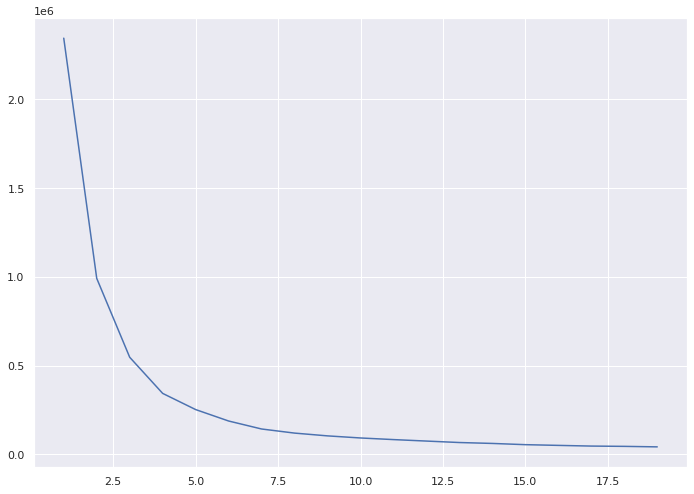

In [9]:
# use bigger plots
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(range(1,20), inertia)

It looks like 5 is the best number of clusters based on inertia

In [10]:
kmeans = KMeans(n_clusters=5, random_state=2718)
clusters = kmeans.fit_predict(passenger_dataset)

Now that I have my clusters, I can attach them back to my original dataframe. This way I can look at what group each row got assigned to.

In [11]:
# makes a new column called "clusters"
dataset['clusters'] = clusters

# **Plots**

Text(0.5, 1.0, 'Ticket Price')

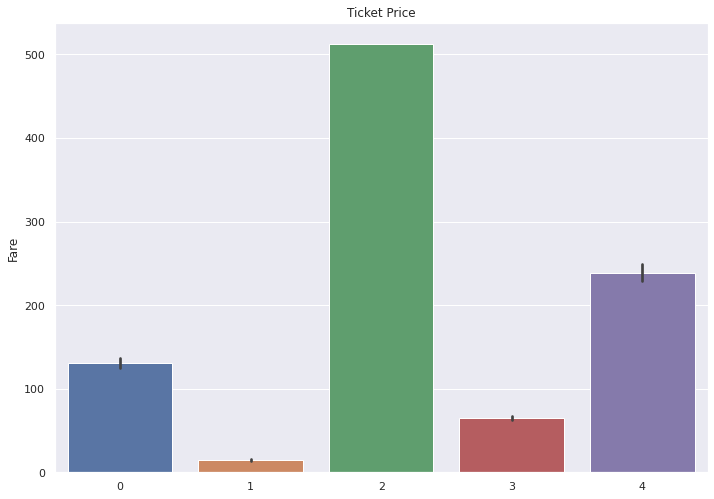

In [12]:
sns.barplot(x=clusters, y=dataset.Fare).set_title('Ticket Price')

Text(0.5, 1.0, 'Embarked Code')

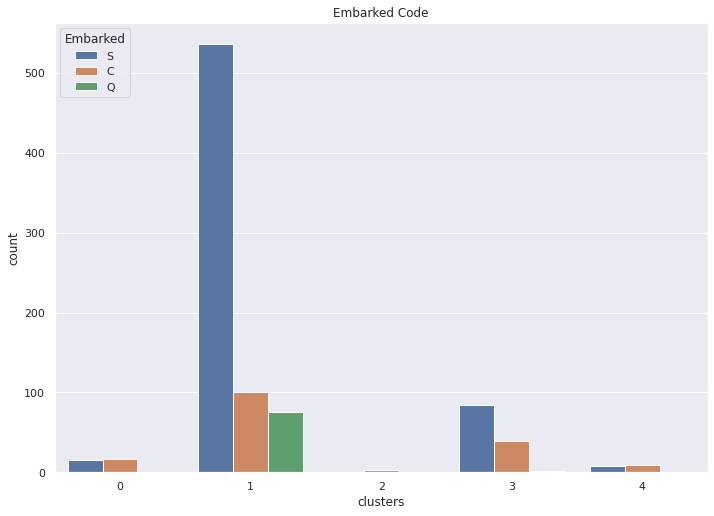

In [13]:
sns.countplot(data=dataset, x='clusters', hue='Embarked').set_title('Embarked Code')

Text(0.5, 1.0, 'Ticket Class')

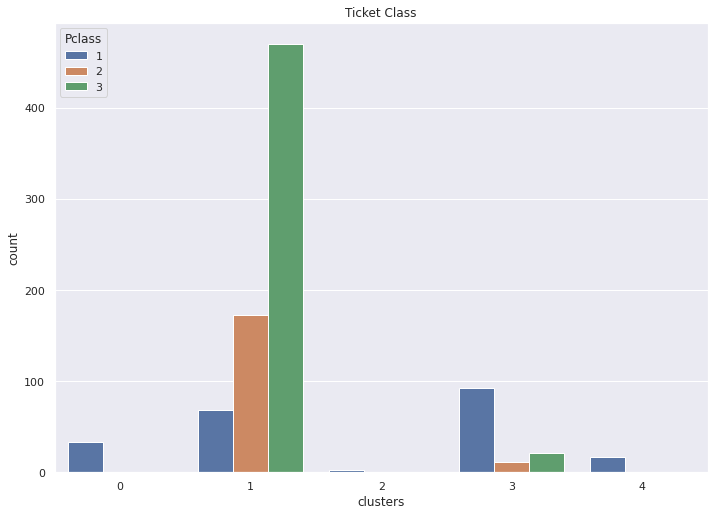

In [14]:
sns.countplot(data=dataset, x='clusters', hue='Pclass').set_title('Ticket Class')

"Pclass" was not included in the passenger_dataset as input to the K-Means clustering model. However, I can still see if I was able to seperate classes in any kind of meaningful way. It looks like group 1 has a vast majority of the 2nd and 3rd class tickets. The other groups are almost exclusively 1st class.

Text(0.5, 1.0, 'Number of Siblings/Close Family')

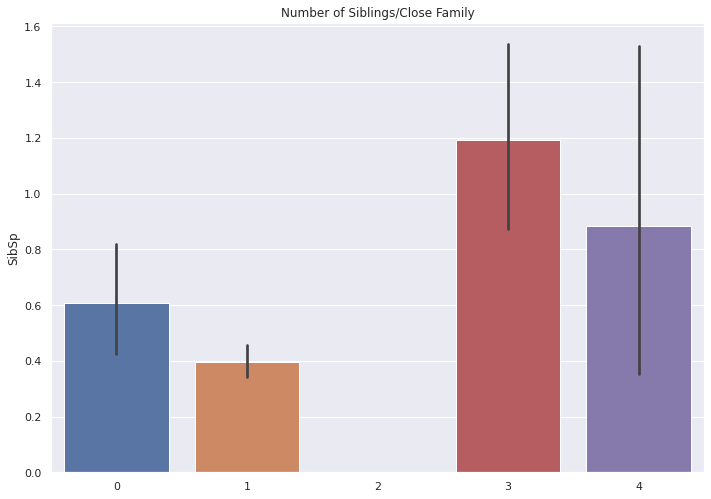

In [15]:
sns.barplot(x=clusters, y=dataset.SibSp).set_title('Number of Siblings/Close Family')

Text(0.5, 1.0, 'Number of Parents/Children')

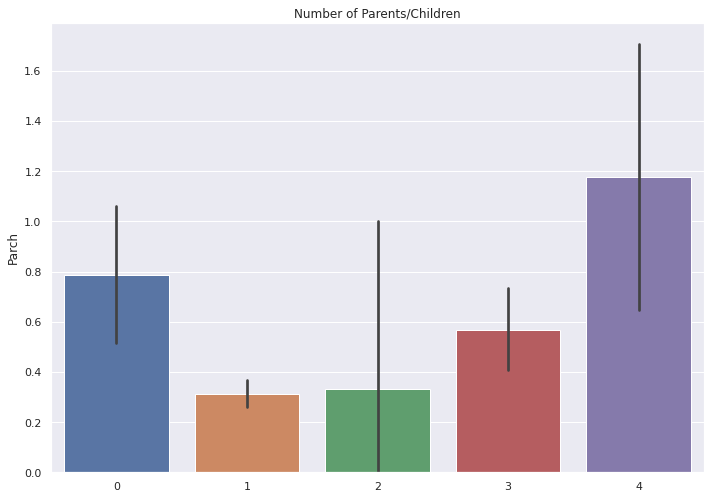

In [16]:
sns.barplot(x=clusters, y=dataset.Parch).set_title('Number of Parents/Children')

Text(0.5, 1.0, 'Sex')

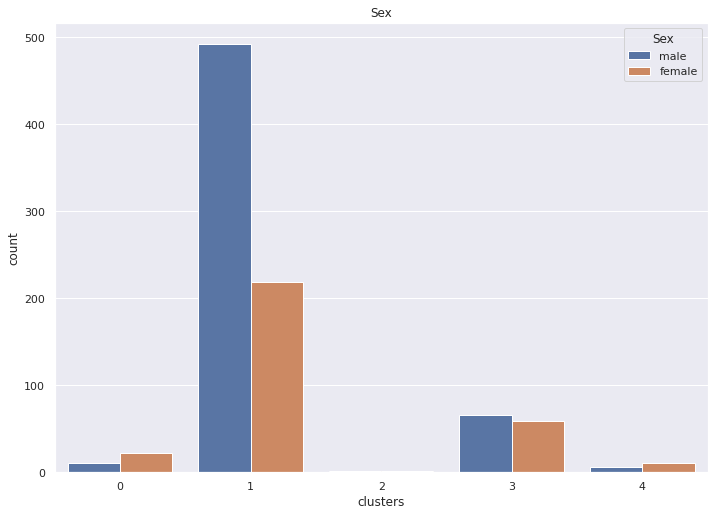

In [17]:
sns.countplot(data=dataset, x='clusters', hue='Sex').set_title('Sex')

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Ticket Price Box-Plot')

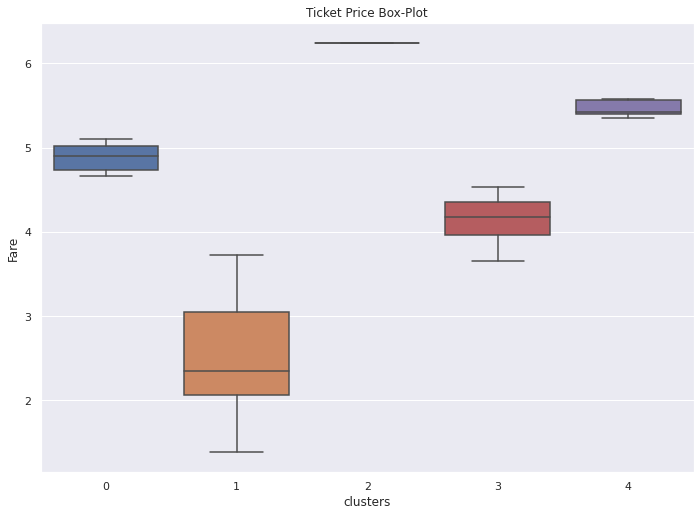

In [18]:
sns.boxplot(x=dataset.clusters, y=np.log(dataset.Fare)).set_title('Ticket Price Box-Plot')

Text(0.5, 1.0, 'Survived')

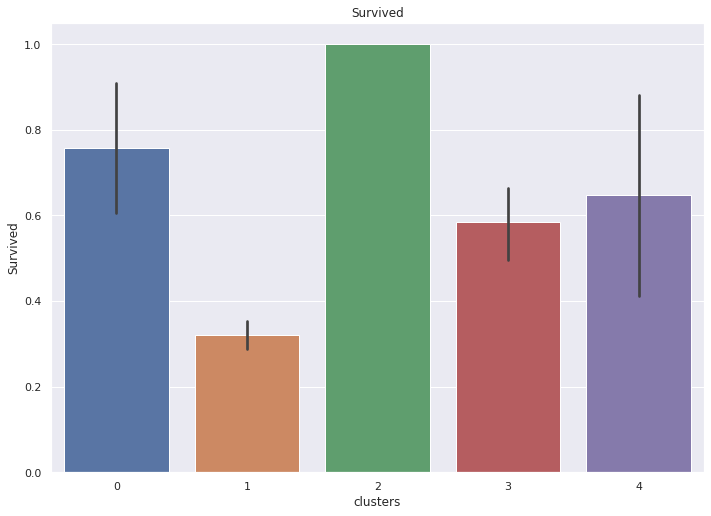

In [19]:
sns.barplot(x=dataset.clusters, y=dataset.Survived).set_title('Survived')

In [20]:
dataset[dataset.clusters == 4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,clusters
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S,4
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,C23 C25 C27,S,4
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,B58 B60,C,4
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,B58 B60,C,4
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,C23 C25 C27,S,4
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C82,C,4
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,NaN,C,4
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,C23 C25 C27,S,4
527,528,0,1,"Farthing, Mr. John",male,29.699118,0,0,PC 17483,221.7792,C95,S,4


In [21]:
dataset[dataset.Fare == dataset.Fare.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,clusters
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,2
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,2


In [22]:
dataset.clusters.value_counts()

1    711
3    125
0     33
4     17
2      3
Name: clusters, dtype: int64

# **Analysis**

With 5 groups there is a bit of imbalance.

**Group 0**

a) The second largest class

b) Seems to be made up mostly of siblings.

**Group 1**

a) Seems to be of 2nd and 3rd class passenger.

b) There is a fair amount of 1st class, but not as many as group 1.

c) Seems to be 75% male.

d) Most people in this group did not survive.

**Group 2**

a) This groups seems to be travelling with the most children

b) They also paid the second most for tickets

**Group 3**

a) Small population, but seems to have more females travelling with siblings or children.

**Group 4**

a) Just 3 people who paid the most for their ticket.

b) They seem to be outliers as far as Fare goes.

c) 100% survived in this group

#**Conclusion**
The basic K-Means put most of the non-first class passengers into 1 group (Group 1). The other groups had different segments of first class passengers. Some travelled with family, while others paid very high amounts for their tickets.